## Welcome to the Banknotes Data Challenge - Day 2! 💶
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🔀 How do banknotes move in the euro area? 🛩️
\
\
We are super excited to have you join us for this second workshop! 🤗\
Today, we will be using Python to investigate data and try to answer the following question: <font color='blue'>**"how do banknotes circulate in the euro area?"**</font>. 


First a bit of introduction! The euro area (or eurozone) is a group of countries in the European Union (EU). They have chosen the euro (€) as their official currency. 
In 2024, there are *20* countries in the eurozone, but it was introduced back in *1999*. Why one currency you may ask?

- easier, cheaper and safer for businesses to buy and sell within the zone and to trade with the rest of the world,
- easy to compare prices between countries,
- improved economic stability and growth,
- greater influence in the global economy, 
- it is a tangible sign of a European identity.

More information on the benefits of the €: [here](https://european-union.europa.eu/institutions-law-budget/euro/benefits_en#:~:text=improved%20economic%20stability%20and%20growth,sign%20of%20a%20European%20identity).


Hence, the citizens of the euro area use the **SAME** banknotes. It means that banknotes can travel between cities and even countries! 💸
\
\
To have an idea of how often this happens, some citizens took the initiative of creating a website: [EurobillTracker](https://en.eurobilltracker.com/).\
The users register the banknotes they have received in shops or by their friends or family. They enter the information about *what*, *where* and *when*.
\
\
How can you identify a banknote from another?
- the *denomination*, which is the value of the banknote like 5, 10, 20, 50, 100, 200, or 500.
- the *serial number*, which is a unique identifier starting with one or two letters, followed by 10 digits.

💭 Would that be possible with coins? Unfortunately not as they don't hold any unique identifier. Did you notice that one side of the coins change from country to country? Actually, each member state is allowed to choose its own design! Each of the eight coins can have the same design (such as Irish coins), or can vary from coin to coin (such as Italian coins). 

In this challenge you are asked to investigate 🔍 where the banknotes have been seen and where they went.\
The data was simulated/faked for the purpose of the challenge.

Don't forget to check out the helper notebook 📚, our friendly AI chatbot 🤖 or the internet 🌐 for more information throughout this challenge!


### Task 1 - Import libraries 📚
Can you import the <font color='darkgreen'> **pandas** </font> package with the pd alias and the package  <font color='darkgreen'> **plotly.express** </font> with the alias px?

In [111]:
import pandas as pd
import plotly.express as px


### Task 2- Load the data 💾

The data is contained in a comma separated value (csv) file called trajectories.\
💡 *csv files are often use by professionals as they store data as text (so easy to read) in columns (easy to search).*

The location of the file is:

In [112]:
filepath = "trajectories.csv"

#### 2.1) Tell Python to read the file 👁️‍🗨️

Now that we know where the *csv* file is, we want to *read* it. To achieve this, we will need a function provided by the 'pandas' library. Can you find which one in the [documentation](https://pandas.pydata.org/docs/user_guide/io.html)? 📝

In [113]:
trajectories = pd.read_csv(filepath)

#### 2.2) Print the first 10 rows of the data 🖨️

In programming, *printing* refers to displaying the information on the screen. 
Actions for manipulating the data are also contained in the *pandas* package.

In [114]:
trajectories.head(10)

Serial Number Denomination City Origin Date Origin City Destination  \
0  PR2039368476        50EUR  Bratislava  2021-10-21          Vilnius   
1  PR2039368476        50EUR     Vilnius  2022-08-15          Vilnius   
2  MJ3935952483        10EUR   Amsterdam  2020-05-09        Amsterdam   
3  MJ3935952483        10EUR   Amsterdam  2020-10-17        Amsterdam   
4  BM2088195525        50EUR      Dublin  2021-02-16           Dublin   
5  MS2652009710        50EUR        Rome  2021-10-28        Ljubljana   
6  MS2652009710        50EUR   Ljubljana  2022-08-10  Luxembourg City   
7  KN4613288185        50EUR   Amsterdam  2020-11-02          Vilnius   
8  VB7261864231         5EUR        Rome  2021-08-18             Rome   
9  VB7261864231         5EUR        Rome  2021-12-08             Rome   

  Date Destination  
0       2022-08-15  
1       2023-05-13  
2       2020-10-17  
3       2021-04-25  
4       2021-12-22  
5       2022-08-10  
6       2023-05-05  
7       2021-09-16  
8       2021-12-08  
9       2022-03-15

### Task 3 - Investigate the characteristics of the banknotes in the data 🕵️‍♀️

Now let's familiarize ourselves with the content of the data. 
Typical manipulations are: to check the number of rows, if values are repeated, the proportion of each characteristic, etc. 

Pandas 🐼 will help us a lot in that exploration! It contains a lot of useful functions that will help you perform the tasks.



#### 3.1) How many observations are in the data? 

First, we are interested in the number of movements of the banknotes in the data. Can you count the number of rows in the dataframe? 💸

*Hint: store that number in a variable, it will be useful later.*

In [115]:
nb_transitions = len(trajectories)
print(nb_transitions)

17042


#### 3.2) Are the serial numbers repeating? 

Second, can you check if some serial numbers are appearing more than one time?
This will allow us to deduce if we have seen more than once some banknotes.
To see if the serial numbers are repeating, we need to first compute the number of **unique** entries and compare that number with the number of transitions.

In [116]:
nb_unique_sn = len(trajectories["Serial Number"].unique())
print(nb_unique_sn)

10000


In [117]:
nb_sn_repeating = nb_transitions - nb_unique_sn
print(nb_sn_repeating)

7042


#### 3.3) Can you find the serial number of the 50EUR banknote that left Zagreb on the 7th of February 2022 and arrived in Bratislava on the 6th of December 2022?

Those are very specific characteristics! The goal is to narrow the large data.frame to only one observation. We aim at *filtering* out the information that is not relevant to the task.

*Hint: you can use multiple conditions in your filtering. To do so each of the condition needs to be between parenthesis. For example, (condition A). To add a condition, you can use the symbol &.*


In [163]:
trajectories[
    (trajectories["Denomination"] == "50EUR")
    &
    (trajectories["City Origin"] == "Zagreb")
    &
    (trajectories["City Destination"] == "Bratislava")
    &
    (trajectories["Date Origin"] == "2022-02-07")
]

Serial Number Denomination City Origin Date Origin City Destination  \
1314  WD5994063010        50EUR      Zagreb  2022-02-07       Bratislava   

     Date Destination  
1314       2022-12-06

#### 3.4) Make a pie chart of the number of banknotes per denomination 🥧

Often, it is easier to do some of the investigations with charts. 📊
 
The goal is to have a visual summary of how much each denomination is represented in the data. We are interested in how many observation has the value 5€, 10€, etc. Hence, you will need to *first* compute the number of observations per denomination. This type of operations is called *aggregation*. To aggregate means that you summarize the data on a defined **characteristic** with a given **operation** such as:

- to count,
- to sum,
- to find the mean,
- ...

But others are possible!

Then, as a *second* step, you can write the code to make the plot with plotly.express as yesterday.



*Hint 1: when performing grouping operations pandas returns the characteristic as **index**. You can overule that decision by adding the argument as_index=False to the groupby function, or by resetting the index with df.reset_index().*

*Hint 2: the operation is performed on all the columns, if not stated otherwise. You may want to perform it only on the column named Serial Number.*

*Hint 3: don't forget to store your new dataframe in a variable that you can use in plot.*

In [119]:
count_bn_per_denom = trajectories.groupby(['Denomination'], as_index=False)["Serial Number"].count()
count_bn_per_denom = count_bn_per_denom.rename(columns= {'Serial Number':'Count Banknotes'})
count_bn_per_denom

Denomination  Count Banknotes
0       100EUR             1308
1        10EUR             2521
2       200EUR              291
3        20EUR             3164
4       500EUR               95
5        50EUR             7412
6         5EUR             2251

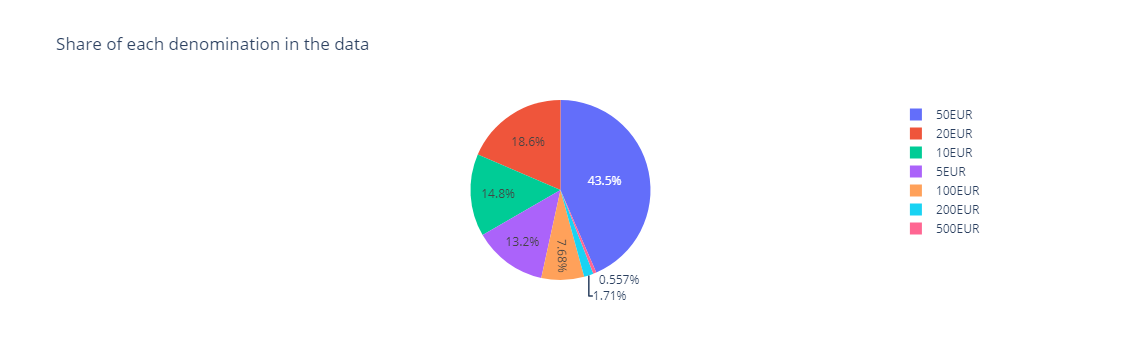

In [120]:
px.pie(
    count_bn_per_denom, 
    values = 'Count Banknotes', 
    names  = 'Denomination', 
    title  = 'Share of each denomination in the data'
)

What do you observe ? 💭

#### 3.5) 💯 Colour the pie chart according to the physical banknotes 🎨

💡 In programming, colors are represented as a combination of three values: <font color='red'>red</font> , <font color='green'>green</font> , and <font color='blue'>blue</font> . These values are typically represented as numbers ranging from 0 to 255, with 0 representing no intensity and 255 representing maximum intensity. This is known as the **RGB color model**. By combining different values of red, green, and blue, you can create a wide range of colors. 🖌️


The colors for the banknotes are the following:

In [121]:
BN_COLOURS = {
  "5EUR"   : "rgb(211, 219, 206)",
  "10EUR"  : "rgb(183, 115, 116)",
  "20EUR"  : "rgb(178, 215, 233)",
  "50EUR"  : "rgb(251, 218, 173)",
  "100EUR" : "rgb(129, 188, 134)",
  "200EUR" : "rgb(255, 231, 123)",
  "500EUR" : "rgb(163, 114, 144)"
}

BN_COLOURS is a **dictionary**. It is a very useful object in Python! 📖

💡 Python dictionary like a real-world dictionary, but instead of words and definitions, it stores data in the form of key-value pairs. Each key in the dictionary is like a word, while the associated value is like the definition of that word.

To add the color to pie chart requires additional arguments to be given to the function. Could you find which ones in [documentation](https://plotly.com/python-api-reference/generated/plotly.express.pie.html)? 📝

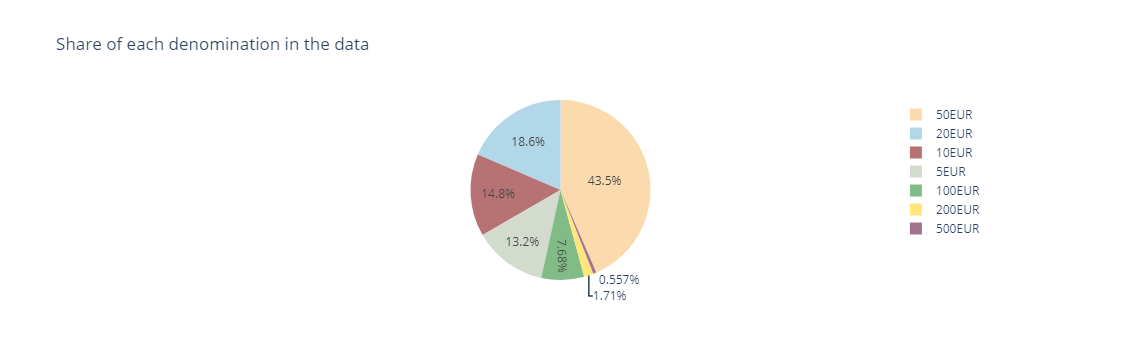

In [122]:
px.pie(
    count_bn_per_denom, 
    values='Count Banknotes', 
    names='Denomination', 
    color= "Denomination",
    color_discrete_map  = BN_COLOURS,
    title='Share of each denomination in the data'
)

### Task 4 - Investigate the movements of the banknotes 🛩️

Now that you have warmed up the concepts of yesterday. Let's get into the topic of today which the circulation of banknotes. We will look at how many times banknotes went from one city to another... or to the same city! 😉 



#### 4.1) Count the number of transitions from one city to another? 

The idea is to adapt the aggregation by count you have done on the denomination.\
But, this time you need to perform the count on 2 columns: 'City Origin' and 'City Destination'.

*Hint: store this information in a new variable as you will need it for the following questions.*

In [123]:
count_bn_per_travel = trajectories.groupby(['City Origin', 'City Destination'], as_index=False)["Serial Number"].count()
count_bn_per_travel = count_bn_per_travel.rename(columns= {'Serial Number':'Count Transition'})
count_bn_per_travel.head(5)

City Origin City Destination  Count Transition
0   Amsterdam        Amsterdam               551
1   Amsterdam           Athens                10
2   Amsterdam           Berlin                19
3   Amsterdam       Bratislava                10
4   Amsterdam         Brussels                83

Let's investigate the aggregated data from task 4.1!

#### 4.2) What are the 5 most common transitions? 📈


In [124]:
count_bn_per_travel.nlargest(n=5, columns="Count Transition")

City Origin City Destination  Count Transition
231     Nicosia          Nicosia               759
21       Athens           Athens               756
210      Madrid           Madrid               724
147      Lisbon           Lisbon               699
336    Valletta         Valletta               697

What do you observe? 💭

#### 4.3) What are the 5 least common travels? 📉

In [125]:
count_bn_per_travel.nsmallest(n = 5, columns = "Count Transition") 

City Origin City Destination  Count Transition
153      Lisbon             Riga                 1
225     Nicosia           Dublin                 1
227     Nicosia           Lisbon                 1
233     Nicosia             Riga                 1
380      Zagreb        Amsterdam                 1

What do you observe? 💭

### Task 5 - Use some mathematics to better understand the data

 
🧮 Analysts use mathematical tools a lot to answer their questions.\
**Probability** is one of those tools. ⚙️

Just a brief recall from your maths classes... The probability is a number between 0 and 1 that represents the likelihood of an event happening. A probability of 0 means the event is impossible, while a probability of 1 means the event is certain. With probability, we can make educated guesses about the future and understand how likely different outcomes are. 🔮🔮

#### 5.1) What is the probability of going from Rome to Paris ?

To compute the probability from data points, we use what is called an *estimator*. It is a mathematical formula that can derive the closest value to the quantity we are interested in. 📝 

Any idea of what could be such formula ?\
💭\
💭\
💭\
💭\
💭

Right! The observed **proportion** of banknotes going from Rome to Paris! ➗ ! Exactly, the formula is

$$
\mathbb{P}(Destination = Paris \cap Origin = Rome) = \frac{\text{Number of banknotes going from Rome to Paris}}{\text{Number of all movements}}.
$$

You alrealdy have the Number of all the movements from 3.1. The Number of banknotes going from Rome to Paris is yet unknown. Let's compute that new number! So the idea is to *filter* for the specific information of the task.


In [126]:
number_of_times_banknotes_go_from_rome_to_paris = count_bn_per_travel[
    (count_bn_per_travel['City Origin'] == "Rome")
    &
    (count_bn_per_travel['City Destination'] == "Paris")
]

number_of_times_banknotes_go_from_rome_to_paris

City Origin City Destination  Count Transition
292        Rome            Paris                13

In [127]:
proba_Rome_to_Paris = number_of_times_banknotes_go_from_rome_to_paris["Count Transition"] / nb_transitions
proba_Rome_to_Paris*100

292    0.076282
Name: Count Transition, dtype: float64

The probability to go from Rome to Paris is 0.000076282 which is very low ! This number can also be read as there is a 0.076282% chance of doing that transition. Here, we multiply by 100 to get the percentage.

#### 5.2) 💯 Can you compute the probabilities for all the possible transitions? 

The goal is to create a new column in the dataframe from question 4.1. In this column, you have to perform the same calculation that in 5.1.

In [128]:
count_bn_per_travel["Proba Travel"] = count_bn_per_travel["Count Transition"] /  nb_transitions
count_bn_per_travel.head()

City Origin City Destination  Count Transition  Proba Travel
0   Amsterdam        Amsterdam               551      0.032332
1   Amsterdam           Athens                10      0.000587
2   Amsterdam           Berlin                19      0.001115
3   Amsterdam       Bratislava                10      0.000587
4   Amsterdam         Brussels                83      0.004870

#### 5.3) 💯 💯 Can you compute the conditional probability? 

💭 What we have computed so far maybe not the most interesting probability...You may have noticed that they are very low.\
AND we have an additional information in the problem... 🕵️‍

**The banknote was in Rome in 5.1!** 💶

Maybe we could use this to get the probability of going to Paris <font color='darkred'> **given** </font> that the banknote is in Rome!

Can you recall from your classes a formula that can help you with such problem? Any idea of what could be such formula ?\
💭\
💭\
💭\
💭\
💭

It is called the Bayes's formula!

$$
\mathbb P(Destination \mid Origin) ={\frac {\mathbb P(Destination \cap Origin)}{\mathbb P(Origin)}}.
$$

So in theory, the probability $\mathbb{P}$ of going to the Destination city given (the $\mid$ symbol) that we are in the Origin city is equal to the ratio of the probability of having done the travel of Origin city to Destination city ( the $\cap$ symbol) over the probability of being in the Origin city.

Good news, $\mathbb P(Destination \cap Origin)$ is exactly what you have computed in 5.2.

Then, let's compute the probability $\mathbb{P}(Origin)$. Similarly, it means computing the proportion of times a banknote has started in a city. The formula for Rome as the departing city would be

$$
\mathbb{P}(Origin = Rome) = \frac{\text{Number of banknotes starting in Rome}}{\text{Number of all movements}}
$$

*Hint: the aggregation required for the task hasn't been done yet.*

In [129]:
count_bn_per_origin = trajectories.groupby(['City Origin'], as_index=False)["Serial Number"].count()
count_bn_per_origin = count_bn_per_origin.rename(columns={"Serial Number": "Count Origin"})
count_bn_per_origin["Proba Origin"] = count_bn_per_origin["Count Origin"] / nb_transitions
count_bn_per_origin.head(5)

City Origin  Count Origin  Proba Origin
0   Amsterdam           876      0.051402
1      Athens           941      0.055217
2      Berlin           903      0.052987
3  Bratislava           883      0.051813
4    Brussels           887      0.052048

Now you need to combine the data for $\mathbb P(Origin)$ with the data for $\mathbb P(Origin \cap Destination)$. 

To do so we can *merge* the dataframes! The idea is to bring in one table the information of two tables. 
It means to match up rows in each table based on a common variable that they share. 

Can you think of a common characteristic between the dataframes from 5.2 and 5.3? 🤔

Once you have found it, you can have a look at the documentation of the [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge) function. 📝 



In [130]:
df_counts_and_probas = pd.merge(count_bn_per_travel, count_bn_per_origin, on='City Origin')
df_counts_and_probas.head()

City Origin City Destination  Count Transition  Proba Travel  Count Origin  \
0   Amsterdam        Amsterdam               551      0.032332           876   
1   Amsterdam           Athens                10      0.000587           876   
2   Amsterdam           Berlin                19      0.001115           876   
3   Amsterdam       Bratislava                10      0.000587           876   
4   Amsterdam         Brussels                83      0.004870           876   

   Proba Origin  
0      0.051402  
1      0.051402  
2      0.051402  
3      0.051402  
4      0.051402

Finally, it remains to create a new column for the conditional probability !

⭐ *Bonus*: There is another way to compute the conditional probability, can you guess which one?



In [131]:
df_counts_and_probas["Conditional Probability"] = df_counts_and_probas["Proba Travel"] /  df_counts_and_probas["Proba Origin"] 
df_counts_and_probas.head(10)

City Origin City Destination  Count Transition  Proba Travel  Count Origin  \
0   Amsterdam        Amsterdam               551      0.032332           876   
1   Amsterdam           Athens                10      0.000587           876   
2   Amsterdam           Berlin                19      0.001115           876   
3   Amsterdam       Bratislava                10      0.000587           876   
4   Amsterdam         Brussels                83      0.004870           876   
5   Amsterdam           Dublin                17      0.000998           876   
6   Amsterdam         Helsinki                10      0.000587           876   
7   Amsterdam           Lisbon                10      0.000587           876   
8   Amsterdam        Ljubljana                15      0.000880           876   
9   Amsterdam  Luxembourg City                35      0.002054           876   

   Proba Origin  Conditional Probability  
0      0.051402                 0.628995  
1      0.051402                 0.011416  
2      0.051402                 0.021689  
3      0.051402                 0.011416  
4      0.051402                 0.094749  
5      0.051402                 0.019406  
6      0.051402                 0.011416  
7      0.051402                 0.011416  
8      0.051402                 0.017123  
9      0.051402                 0.039954

What do you observe? 💭

### Task 6 - 💯 💯 💯 Create a map to display the conditional probabilities of the transitions 🗺️

That's a difficult one ! You will need a lot of ingredients to make a map. But which ones? 🤔


#### 6.1) Get familiar the positions of the eurozone capitals 🌍

The positions in terms of latitude and longitude of the capitals of the countries in the eurozone have been defined for you in the dataframe *pd_capitals* in the cell below.

**Latitude** is the measurement of how far north or south a location is from the equator, which is an imaginary line that circles the Earth's middle. The equator is assigned a latitude of 0 degrees. The latitude of a location can be measured in degrees, minutes, and seconds.

**Longitude**, on the other hand, is the measurement of how far east or west a location is from the Prime Meridian, which is an imaginary line that runs from the North Pole to the South Pole and passes through Greenwich, England. The Prime Meridian is assigned a longitude of 0 degrees. Longitude is also measured in degrees, minutes, and seconds.

Together, latitude and longitude provide a precise way to locate any place on Earth.

In [132]:
pd_capitals = pd.DataFrame([
    ['Finland', 'Helsinki', 60.170833, 24.9375],
    ['Estonia','Tallinn', 59.437222, 24.745278],
    ['Latvia', 'Riga', 56.948889, 24.106389],
    ['Lithuania', 'Vilnius', 54.687222, 25.28],
    ['Ireland', 'Dublin', 53.344167, -6.2675],
    ['Netherlands', 'Amsterdam', 52.372778, 4.893611],
    ['Germany', 'Berlin', 52.52, 13.405],
    ['Belgium', 'Brussels', 50.846667, 4.3525],
    ['Luxembourg', 'Luxembourg City', 49.611667, 6.131944],
    ['Slovakia', 'Bratislava', 48.143889, 17.109722],
    ['France', 'Paris', 48.856613, 2.352222],
    ['Italy', 'Rome', 41.9, 12.483333],
    ['Austria', 'Vienna', 48.2, 16.366667],
    ['Portugal', 'Lisbon', 38.725267, -9.150019],
    ['Spain', 'Madrid', 40.416667, -3.7025],
    ['Slovenia', 'Ljubljana', 46.051389, 14.506111],
    ['Croatia', 'Zagreb', 45.816667, 15.983333],
    ['Greece', 'Athens', 37.984167, 23.728056],
    ['Malta', 'Valletta', 35.884445, 14.506944],
    ['Cyprus', 'Nicosia', 35.185566, 33.382275]
])

pd_capitals.columns = ["Country", "City", "latitude", "longitude"]

#### 6.2) Create a dataframe that contains the information of the Positions of the City of Origin and City of Destination together with the Conditional Probability

As seen in the previous task, we can *merge* 2 dataframes into 1. ⚠️ Careful here, you will need the latitude and longitude of the City of Origin and the City of Destinaton. Hence, you will need to perform 2 merges! 

*Hint 1: when the name of the common characteristic is different in the two dataframes, you can use the arguments **left_on** and **right_on** to specify the names in each table. Right and left are defined according to the first dataframe in the arguments of the merge function (left) and the second dataframe argument (right).*

*Hint 2: when you merge for the second time, the columns of pd_capitals already exist in the dataframe from the first merge. You can specify the argument suffixes for defining the names of the repeated columns. By default, it is set to ["_x", "_y"].*



In [133]:
geo_proba_df = pd.merge(pd_capitals, df_counts_and_probas, left_on = "City", right_on = "City Origin")
geo_proba_df = pd.merge(pd_capitals, geo_proba_df, left_on = "City", right_on = "City Destination", suffixes=["_origin", "_destination"])

geo_proba_df.head(10)

Country_origin City_origin  latitude_origin  longitude_origin  \
0        Finland    Helsinki        60.170833           24.9375   
1        Finland    Helsinki        60.170833           24.9375   
2        Finland    Helsinki        60.170833           24.9375   
3        Finland    Helsinki        60.170833           24.9375   
4        Finland    Helsinki        60.170833           24.9375   
5        Finland    Helsinki        60.170833           24.9375   
6        Finland    Helsinki        60.170833           24.9375   
7        Finland    Helsinki        60.170833           24.9375   
8        Finland    Helsinki        60.170833           24.9375   
9        Finland    Helsinki        60.170833           24.9375   

  Country_destination City_destination  latitude_destination  \
0             Finland         Helsinki             60.170833   
1             Estonia          Tallinn             59.437222   
2              Latvia             Riga             56.948889   
3           Lithuania          Vilnius             54.687222   
4             Ireland           Dublin             53.344167   
5         Netherlands        Amsterdam             52.372778   
6             Germany           Berlin             52.520000   
7             Belgium         Brussels             50.846667   
8          Luxembourg  Luxembourg City             49.611667   
9            Slovakia       Bratislava             48.143889   

   longitude_destination      City Origin City Destination  Count Transition  \
0              24.937500         Helsinki         Helsinki               554   
1              24.745278          Tallinn         Helsinki               143   
2              24.106389             Riga         Helsinki                42   
3              25.280000          Vilnius         Helsinki                30   
4              -6.267500           Dublin         Helsinki                 9   
5               4.893611        Amsterdam         Helsinki                10   
6              13.405000           Berlin         Helsinki                14   
7               4.352500         Brussels         Helsinki                14   
8               6.131944  Luxembourg City         Helsinki                 7   
9              17.109722       Bratislava         Helsinki                 9   

   Proba Travel  Count Origin  Proba Origin  Conditional Probability  
0      0.032508           890      0.052224                 0.622472  
1      0.008391           928      0.054454                 0.154095  
2      0.002464           822      0.048234                 0.051095  
3      0.001760           935      0.054864                 0.032086  
4      0.000528           841      0.049349                 0.010702  
5      0.000587           876      0.051402                 0.011416  
6      0.000821           903      0.052987                 0.015504  
7      0.000821           887      0.052048                 0.015784  
8      0.000411           875      0.051344                 0.008000  
9      0.000528           883      0.051813                 0.010193

#### 6.3) Split the dataframe for banknotes that return to the same or to a different city

Let's simplify the next steps and divide the dataframe in two.

The goal is to get one dataframe with information on trips to the same city (i.e City Origin = City Destination) and another dataframe with the information for the case where City Origin and City Destination are different.

In [134]:
same_origin_destination_df = geo_proba_df[geo_proba_df["City Origin"] == geo_proba_df["City Destination"]]
same_origin_destination_df.head(5)


Country_origin City_origin  latitude_origin  longitude_origin  \
0         Finland    Helsinki        60.170833         24.937500   
21        Estonia     Tallinn        59.437222         24.745278   
42         Latvia        Riga        56.948889         24.106389   
63      Lithuania     Vilnius        54.687222         25.280000   
84        Ireland      Dublin        53.344167         -6.267500   

   Country_destination City_destination  latitude_destination  \
0              Finland         Helsinki             60.170833   
21             Estonia          Tallinn             59.437222   
42              Latvia             Riga             56.948889   
63           Lithuania          Vilnius             54.687222   
84             Ireland           Dublin             53.344167   

    longitude_destination City Origin City Destination  Count Transition  \
0               24.937500    Helsinki         Helsinki               554   
21              24.745278     Tallinn          Tallinn               578   
42              24.106389        Riga             Riga               547   
63              25.280000     Vilnius          Vilnius               659   
84              -6.267500      Dublin           Dublin               662   

    Proba Travel  Count Origin  Proba Origin  Conditional Probability  
0       0.032508           890      0.052224                 0.622472  
21      0.033916           928      0.054454                 0.622845  
42      0.032097           822      0.048234                 0.665450  
63      0.038669           935      0.054864                 0.704813  
84      0.038845           841      0.049349                 0.787158

In [135]:
diff_origin_destination_df = geo_proba_df[geo_proba_df["City Origin"] != geo_proba_df["City Destination"]]
diff_origin_destination_df.head(5)

Country_origin City_origin  latitude_origin  longitude_origin  \
1        Finland    Helsinki        60.170833           24.9375   
2        Finland    Helsinki        60.170833           24.9375   
3        Finland    Helsinki        60.170833           24.9375   
4        Finland    Helsinki        60.170833           24.9375   
5        Finland    Helsinki        60.170833           24.9375   

  Country_destination City_destination  latitude_destination  \
1             Estonia          Tallinn             59.437222   
2              Latvia             Riga             56.948889   
3           Lithuania          Vilnius             54.687222   
4             Ireland           Dublin             53.344167   
5         Netherlands        Amsterdam             52.372778   

   longitude_destination City Origin City Destination  Count Transition  \
1              24.745278     Tallinn         Helsinki               143   
2              24.106389        Riga         Helsinki                42   
3              25.280000     Vilnius         Helsinki                30   
4              -6.267500      Dublin         Helsinki                 9   
5               4.893611   Amsterdam         Helsinki                10   

   Proba Travel  Count Origin  Proba Origin  Conditional Probability  
1      0.008391           928      0.054454                 0.154095  
2      0.002464           822      0.048234                 0.051095  
3      0.001760           935      0.054864                 0.032086  
4      0.000528           841      0.049349                 0.010702  
5      0.000587           876      0.051402                 0.011416

#### 6.4) Code the map 🗺️

On a map of Europe, it would be ideal to display:
- points on the cities with a **size** according to the conditional probability of returning to the same city,
- lines between the cities to display by **opacity** the conditional probability of traveling from one city to the other given the city of orgin.

The function for the points is *scatter_geo* and for the lines *add_trace*. The second is a bit difficult to use as you need to add one line per one line.
To do repetitive task like this one, you can use *for* loops. 

To make it easier for you, we have created a function called *create_map* that produce the map for you. Nevertheless, you will have to provide the correct arrguments.

Have a look at the function and then try to use it.

*Hint: you need to run the cell to be able to use the dunction.*


In [150]:
import plotly.graph_objects as go
def create_map(df, colname_weight, colname_lat_origin, colname_lon_origin, colname_lat_dest, colname_lon_dest):
    
    # Add the points to the map
    fig = px.scatter_geo(df[df[colname_lat_origin] == df[colname_lat_dest]], 
                         lat = colname_lat_origin,
                         lon = colname_lon_origin,
                         color = colname_lat_origin, 
                         size = colname_weight
                        )


    diff_origin_destination_df = df[df[colname_lat_origin] != df[colname_lat_dest]]
    diff_origin_destination_df = diff_origin_destination_df.reset_index()
    # Add the lines on the map
    for i in range(len(diff_origin_destination_df)):
        fig.add_trace(
            go.Scattergeo(
                lon = [diff_origin_destination_df[colname_lon_origin][i], diff_origin_destination_df[colname_lon_dest][i]],
                lat = [diff_origin_destination_df[colname_lat_origin][i], diff_origin_destination_df[colname_lat_dest][i]],
                mode = 'lines',
                line = dict(width = 3, color = 'red'),
                opacity = diff_origin_destination_df[colname_weight][i] + 0.03,
                hoverinfo = 'text',
                text = diff_origin_destination_df[colname_weight][i]
            )
        ) 



    # Some additional parameters
    fig.update_layout(geo={
        "projection":{"type":"natural earth"}, 
        "center": {"lat": 48.143889, "lon":17.109722}
        },
        showlegend = False
    )

    fig.update_coloraxes(showscale=False)
    fig.update_geos(projection_scale=4, showcountries=True)
    fig.update_layout(margin=dict(t=50, r=50,  l=50), height=800, width=800) 

    # Show the map
    return fig.show()


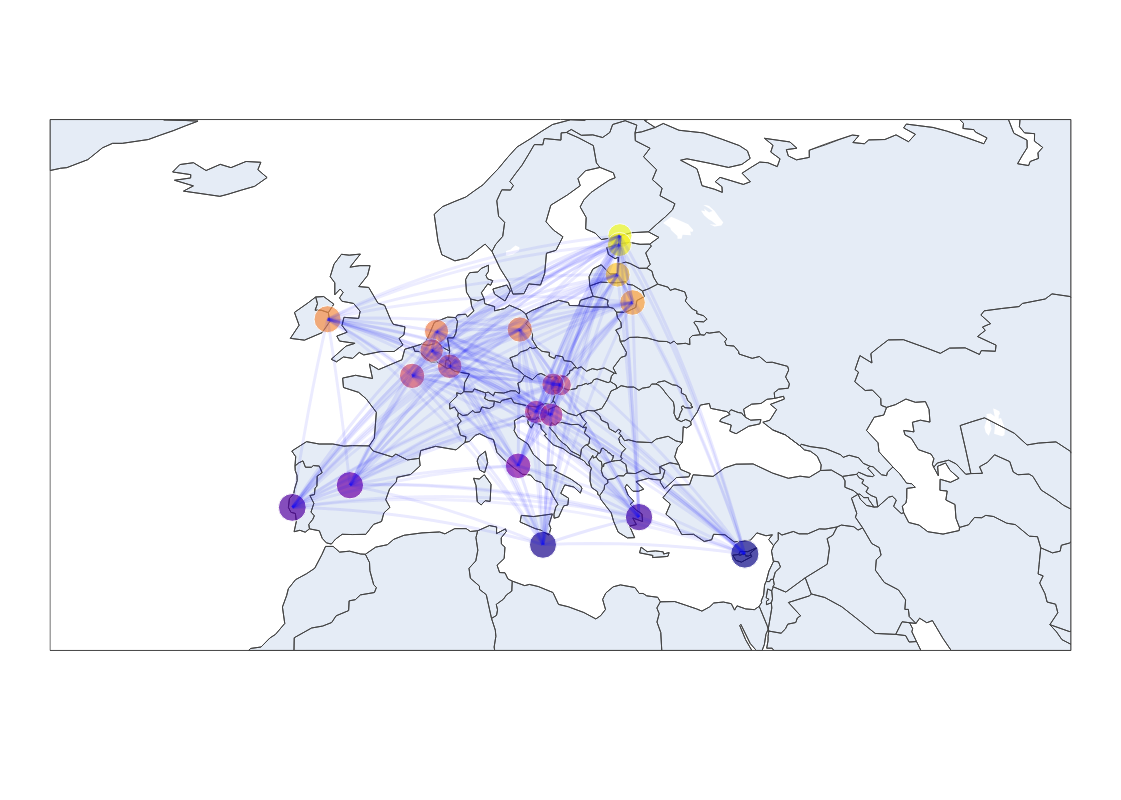

In [151]:
create_map(geo_proba_df, "Conditional Probability", "latitude_origin", "longitude_origin", "latitude_destination", "longitude_destination")

**Congratulations for making it to the end!** 🙌 🙌

The challenge on the circulation of banknotes was not easy...  We hope that you enjoyed the journey and learnt a lot on the way! Would you share with us what were the parts that you liked the most and the least?


But the challenge doesn't need to end here... you can continue to explore the data and discover new things in the cell below. There is still a lot to explore on the movements of banknotes according to the denomination or the dates!! 

Have fun!